# Assessment Problems

## Problem 1: Data from yfinance

Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
Create the `data` folder if you don't already have one.

In [1]:
# Data frames.
import pandas as pd

# Dates and times.
import datetime as dt

# Plotting
import matplotlib.pyplot as plt

# Listing files in a folder.
import os

# Yahoo Finance data.
import yfinance as yf

tickers = ["META","AAPL","AMZN","NFLX","GOOG"]
# Function get_data
def get_data():

    # Get data.
    df = yf.download(tickers,period="5d",interval="1h",auto_adjust=False)

    # Create data folder if it doesn't already exist
    os.makedirs("data", exist_ok=True)

    # Format date and time.
    now = dt.datetime.now()

    # create file name with format YYYYMMDD-HHmmss
    filename = now.strftime("%Y%m%d-%H%M%S")

    # Save data as csv in folder data
    df.to_csv(f"data/{filename}.csv")
    print(f"The file {filename} is now in folder 'data'.")
    return

# Run the function and capture the data frame
get_data()

[*********************100%***********************]  5 of 5 completed

The file 20251216-215925 is now in folder 'data'.


## Problem 2: Plotting Data

Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.
The plot should include axis labels, a legend, and the date as a title.
The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.
Create the `plots` folder if you don't already have one.

<Figure size 1500x700 with 0 Axes>

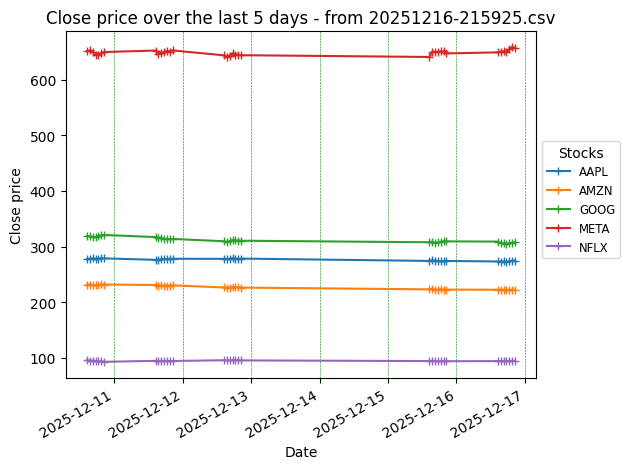

The plot of the Close price of FAANG in 20251216-215925.csv is now saved in folder 'plot'.


In [ ]:
# Function plot_data
def plot_data():

    # List the files in the data folder.
    data_files = os.listdir('data')

    # Sort the list of files.
    data_files=sorted(data_files, reverse=True)

    # The latest file.
    latest_file = data_files[0]

    # Read the CSV file.
    df = pd.read_csv(f'data/{latest_file}', header=[0, 1], index_col=0, parse_dates=True)
    df.head()

    # Create 'plots' folder if it doesn't already exist
    os.makedirs("plots", exist_ok=True)

    # Plot the Close price.
    plt.figure(figsize=(15,7))
    
    df['Close'].plot(marker='+')
    plt.title("Close price over the last 5 days - from " + latest_file)
    plt.xlabel('Date')
    plt.ylabel('Close price')
    plt.grid(axis = 'x', color = 'green', linestyle = '--', linewidth = 0.4)
    plt.legend(title="Stocks",fontsize='small',bbox_to_anchor=(1,0.7))
    plt.tight_layout()

    # Name of the plot
    plot_name = latest_file[:-4]
    # put a copy of the image of the plot (.png file) into the `plots` folder in the root of my repository
    plt.savefig(f"plots/{plot_name}.png")

    plt.show()

    print(f"The plot of the Close price of FAANG in {latest_file} is now saved in folder 'plots'.")

    return

# Run the function and capture the plot
plot_data()

## Problem 3: Script

Create a Python script called `faang.py` in the root of your repository.
Copy the above functions into it and make it so that whenever someone at the terminal types `./faang.py`, the script runs, downloading the data and creating the plot.
Note that this will require a shebang line and the script to be marked executable.
Explain the steps you took in your notebook.

### Explanation of steps
1. Create `faang.py` in the root of my repository
2. On the first line of the file, I put in the shebang line:


In [ ]:
#!/usr/bin/env python3

3. I copied function `get_data` from Problem 1 and function `get_plot` from Problem 2 into the script
4. I added a main() function that:
- Downloads the FAANG stocks data
- Saves it as a CSV named with format `YYYYMMDD-HHmmss.csv` into 'data' folder
- Generates a plot of the Close prices of FAANG stocks
- Saves the plot named with format `YYYYMMDD-HHmmss.png` into 'plots' folder

In [ ]:
def main():
    # Run the function and capture the data frame
    get_data()
    # Run the function and capture the plot
    plot_data()

if __name__ == "__main__":
    main()

5. In the terminal, I made the script executable by typing: chmod u+x faang.py
6. I ran the script by typing: ./faang.py

## Problem 4: Automation

Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning.
The script should be called `faang.yml` in a `.github/workflows/` folder in the root of your repository.
In your notebook, explain each of the individual lines in your workflow.

### Explanation of lines in workflow

```python
name: Run faang.py every Saturday morning
```
Define the name of the workflow. This name 'Run faang.py every Saturday morning' will be displayed in the Actions tab in Github
<br>
<br>
```python
on:
  schedule:
    # From https://crontab.guru/#05_07_*_*_6
    - cron: '05 07 * * 6'
  workflow_dispatch: # allows manual run from GitHub UI
```
`on:` defines the event(s) that triggers the workflow. <br>
In this case, the timebase trigger is defined by `schedule:` <br>
`cron:` syntax run the workflow every Saturday at 7:05am <br>
`workflow_dispatch:` allows users to manually run the workflow from the GitHub Actions UI in purpose to test the workflow
<br>
<br>
```python
permissions:
  contents: write  # Required for pushing commits back to the repository
```
`permissions:` defines what the workflow is allowed to do in the repository

`contents: write` lets the workflow change the content of the repository. This is necessary for committing changes and pushing commits back to GitHub
<br>
<br>
```python
jobs:
  run-script:
    runs-on: ubuntu-latest
```
`jobs:` defines all the jobs done by the workflow <br>
The job goes through `run-script:` and `runs-on:` the virtual machine 'ubuntu-latest' which is a version of Linux on Github
<br>
<br>
```python
    steps:
      # 1. Checkout the repository
      - name: Checkout repository
        uses: actions/checkout@v6
```
Step 1: Checkout the repository using the check out action pre-configured. The name of this step 'Checkout repository' will be displayed in Actions UI. 
<br>
<br>
```python
      # 2. Set up Python
      - name: Set up Python
        uses: actions/setup-python@v5
        with:
          python-version: '3.x'
```
Step 2: Label the step 'Set up Python' and set up Python as it is not installed by default.
<br>
<br>
```python
      # 3. Install Python dependencies
      - name: Install dependencies
        run: |
          python -m pip install --upgrade pip
          pip install pandas matplotlib yfinance
```
Step 3: Label the step 'Install dependencies' and install the dependencies: pandas, matplotlib, y finance. 
<br>
<br>
```python
      # 4. Make faang.py executable
      - name: Make faang.py executable
        run: chmod +x faang.py
```
Step 4: Label the step 'Make faang.py executable'. <br>
`run: chmod +x faang.py` grants execute permission to `faang.py` which allows it to be run as `./faang.py` instead of `python faang.py`.
<br>
<br>
```python
      # 5. Run faang.py
      - name: Run faang.py
        run: ./faang.py
```
Step 5: Label the step 'Run faang.py' an run the Python script.
<br>
<br>
```python
      # 6. Commit and push changes
      - name: Commit and push changes
        run: |
          git config --global user.name "github-actions[bot]"
          git config --global user.email "github-actions[bot]@users.noreply.github.com"

          git add .
          git commit -m "Automated run of faang.py" || echo "No changes to commit"
          git push
```
Step 6: Label the step 'Commit and push changes'. <br>
Set the Git username for commits. <br>
Set the Git commit author email. <br>
Stages all changed files in the repository. <br>
Commits changes with a message. <br>
Pushes the commit back to the repository.

References:

https://www.geeksforgeeks.org/python/python-os-makedirs-method/

https://matplotlib.org/stable/users/explain/axes/tight_layout_guide.html

https://docs.github.com/en/actions/reference/workflows-and-actions/events-that-trigger-workflows

https://crontab.guru

https://chatgpt.com/c/694007a2-6174-8333-80a2-ee5ab06138b3
